Author @Tonghong Chen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
% matplotlib inline

# Data Preparation

In [2]:
df = sns.load_dataset('iris')
X = df.iloc[:, :-1]
y = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### create training and testing datasets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

D:\OS_App\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### standardize the training data

In [5]:
from sklearn.preprocessing import StandardScaler
X_std_train = StandardScaler().fit_transform(X_train)
X_std_test = StandardScaler().fit_transform(X_test)

****

## PCA

In [6]:
from sklearn.decomposition import PCA

#### PCA  Screeplot

In [7]:
def screeplot(X, pca):
    
    # Dimension indexing
    dimensions = ['{0} Principal Component'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend(loc = 0)   #auto (best) location. https://matplotlib.org/api/legend_api.html

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

##### Train a PCA model with 5 components

,Explained Variance,sepal_length,sepal_width,petal_length,petal_width
1 Principal Component,0.7424,0.5121,-0.3081,0.5751,0.5586
2 Principal Component,0.2140,-0.4033,-0.9095,-0.0374,-0.0934
3 Principal Component,0.0388,-0.7216,0.2489,0.1707,0.6231
4 Principal Component,0.0047,-0.2332,0.1260,0.7992,-0.5394


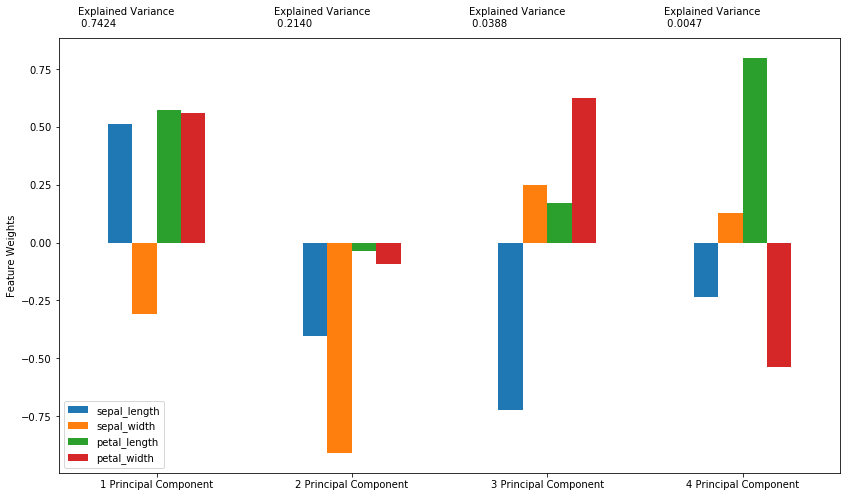

In [8]:
pca = PCA().fit(X_std_train) 
screeplot(pd.DataFrame(X_std_train, columns=X.columns), pca)

#### PCA  Biplot

In [9]:
def biplot(u, y, cat_names, title):
    ax = plt.axes()

    ## plot the colorful scatter plot
    for i in y.unique():
        ax.scatter(u[y == i, 0], u[y == i, 1], cmap='inferno', alpha=.8, lw=2, label=y);

    ## plot the variable weights on each PC
    first_comp_center = u[:,0].mean()
    second_comp_center = u[:,1].mean()
    
    for i in range(pca.components_.shape[0]):
        ax.arrow(first_comp_center, second_comp_center, 
                 pca.components_[i, 0], pca.components_[i, 1], 
                 head_width=0.2, head_length=0.2, linewidth=2, color='red')

        ax.text(first_comp_center+1.8*pca.components_[i, 0], second_comp_center+1.8*pca.components_[i, 1], 
                X.columns[i], color='brown', ha='center', va='center', fontsize=15)

    ## add the legend and title
    ax.legend(cat_names)
    plt.title(title)

In [10]:
pca = PCA().fit(X_std_train) 
u = pca.transform(X_std_train)

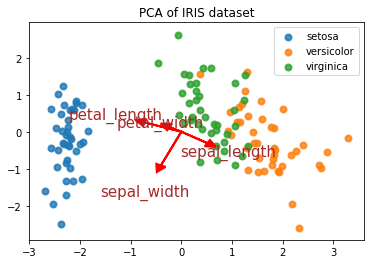

In [11]:
biplot(u, y_train, cat_names = ['setosa', 'versicolor', 'virginica'], title = 'PCA of IRIS dataset')

****

## LDA (only useful in multiple classes + lots of features)

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. 

<img src = 'https://doc-0s-88-docs.googleusercontent.com/docs/securesc/mat9496bk0j9f1bdfd7ucounaueghnd6/rbu1ion1mj8pchrulikcoj5t36d0qhnt/1525809600000/10227535861625187558/05547520987048988776/1fg170inBr5e7huB5B-1PHfjPfXLAxxnr?nonce=bqm22dndvor5m&user=05547520987048988776&hash=de05kfukquhr90bvj3o8u5geivrs72rc' width = 50% align = 'left'>

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_std_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
print('explained variance ratio (first two components): %s' % str(lda.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.9932273  0.0067727]


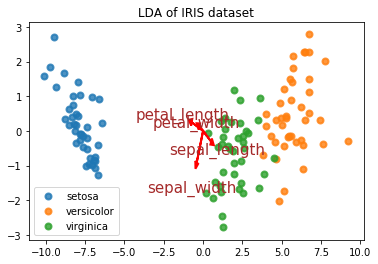

In [15]:
u = lda.transform(X_std_train)
biplot(u, y_train, cat_names = ['setosa', 'versicolor', 'virginica'], title = 'LDA of IRIS dataset')